# California Housing Price Prediction - Capstone Project 3

## 1. Business Problem Understanding

### Konteks Dataset
Dataset yang digunakan berisi data sensus perumahan dari **California pada tahun 1990**. Dataset ini adalah regresi geografis yang populer, yang digunakan untuk menguji algoritma machine learning. Setiap baris data mewakili satu blok kelompok (block group) di California. Tujuan utama dari analisis ini adalah untuk **memprediksi nilai median rumah (`median_house_value`)** di setiap blok berdasarkan fitur-fitur geografis dan demografis.

### Problem Statement California Housing Price Prediction
Penentuan harga properti adalah masalah kompleks yang dipengaruhi oleh banyak faktor seperti lokasi, usia rumah, jumlah kamar, dan pendapatan penduduk di area tersebut. Bagi investor, pengembang properti, atau pemerintah daerah, memiliki alat yang dapat memprediksi nilai rumah secara akurat sangat penting untuk:

- **Pengambilan keputusan investasi**  : Mengetahui di mana nilai properti kemungkinan akan meningkat.
- **Penilaian properti yang lebih adil**  : Memastikan harga jual/beli mendekati nilai pasar.
- **Perencanaan kota dan zonasi**  : Memahami hubungan antara faktor demografi/geografis dengan nilai properti untuk perencanaan infrastruktur dan zonasi.
- **Estimasi potensi kenaikan/penurunan nilai properti** :
Tantangannya adalah membangun **model regresi yang andal** di tengah variasi besar antar wilayah blok-blok di California.

### Project Goals
1. **Mengembangkan model regresi** untuk memprediksi `median_house_value`.  
2. **Mengidentifikasi fitur paling berpengaruh**, seperti lokasi, pendapatan, dan kedekatan dengan laut.  
3. **Memberikan insight bisnis** bagi stakeholders terkait perencanaan dan investasi properti.

## 2. Analytic Approach

Pendekatan utama: **Regresi** (karena target berupa nilai kontinu).

### Data Preprocessing
- Membersihkan data dengan cek missing value dan duplicated data 
- Menangani outliers  
- Melakukan EDA (Exploratory Data Analysis)
- Menyamaratakan data dalam suatu satuan yang mempermudah analisis (encoding)

### Feature Engineering
- Membuat fitur baru dan standarisasi yang sesuai dengan kebutuhan.

### Modeling
Model yang akan dicoba:
- **Linear Regression**  
- **Decision Tree Regressor**  
- **Random Forest Regressor**  
- **KNeighborsRegressor**  
- **SVR**  
- (opsional) LightGBM (Boost)

Model terbaik dipilih berdasarkan performa pada data validasi.

## 3. Evaluation Metrics

###  RMSE *Root Mean Squared Error*
Mengukur seberapa besar error model secara rata-rata. Sensitif terhadap outliers.  
> Semakin kecil RMSE, semakin baik.

###  MAE *Mean Absolute Error*
Rata-rata perbedaan absolut antara nilai prediksi dan aktual.  
> Semakin kecil MAE, semakin baik.

###  R² *R-squared*
Mengukur persentase variansi target yang bisa dijelaskan oleh fitur.  
> Semakin mendekati 1, semakin baik.

## 4. Data Dictionary 

| **Columns**           | **Description**                                                                 |
|-------------------------|---------------------------------------------------------------------------------|
| longitude               | Posisi geografis (semakin ke barat nilainya semakin kecil).                    |
| latitude                | Posisi geografis (semakin ke utara nilainya semakin besar).                    |
| housing_median_age      | Usia median rumah dalam blok.                              |
| total_rooms             | Jumlah total kamar di semua rumah dalam satu blok.                             |
| total_bedrooms          | Jumlah total kamar tidur di semua rumah dalam satu blok.                       |
| population              | Jumlah total populasi di blok tersebut.                                        |
| households              | Jumlah total rumah tangga (keluarga) dalam blok.                               |
| median_income           | Pendapatan median rumah tangga (dalam puluhan ribu USD).                       |
| ocean_proximity         | Kedekatan lokasi terhadap laut atau samudra.                                   |
| median_house_value      | Nilai median rumah (target variabel) dalam USD.                                |


In [188]:
# Library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor


from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [189]:
# Load Dataset
df = pd.read_csv("data_california_house.csv")

## **General Information**

In [190]:
# Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [191]:
# Columns Information
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [192]:
# Analisis Deskriptif (Numerikal)
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  14448.000000  14448.000000        14448.000000  14448.000000   
mean    -119.566647     35.630093           28.618702   2640.132683   
std        2.006587      2.140121           12.596694   2191.612441   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14448.000000  14448.000000   14448.000000   
mean       538.260709   1425.157323    499.508929       3.866667   
std        423.577544   1149.580157    383.098390       1.891158   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.570600   
50%        435.000000   1165.000000    410.000000       3.539100   
75%        647.000000   1724.000000    604.000000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14448.000000  
mean        206824.624516  
std         115365.476182  
min          14999.000000  
25%         119600.000000  
50%         180000.000000  
75%         263900.000000  
max         500001.000000

## Hasil Analisis Statistik 

### 1. longitude
- **Mean:** -119.56 → Lokasi rata-rata berada di California bagian barat.  
- **Min/Max:** -124.35 hingga -114.31 → Rentang posisi geografis dari barat ke timur California.  
- **Kesimpulan:** Rentangnya sesuai dengan koordinat geografis California.


### 2. latitude
- **Mean:** 35.63 → Lokasi rata-rata berada di bagian tengah California secara utara-selatan.  
- **Min/Max:** 32.54–41.95 → Mewakili area dari Selatan California hingga dekat Oregon.  

### 3. housing_median_age
- **Mean:** 28.61 tahun  
- **Min/Max:** 1–52 tahun  
- **IQR:**  
  - 25% = 18  
  - 50% = 29  
  - 75% = 37  
- **Insight:** Mayoritas rumah berusia 18–37 tahun; rumah tertua dalam data berusia 52 tahun (batas dataset).

### 4. total_rooms
- **Mean:** 2640 kamar per block group  
- **Std:** 2191 → Variasi sangat besar antar wilayah  
- **Min/Max:** 2 hingga 32.627  
- **Insight:** Ada area dengan sedikit sekali rumah (blok pedesaan) dan area dengan ribuan kamar (wilayah padat).

### 5. total_bedrooms
- **Mean:** 538 kamar tidur  
- **Std:** 423 → Variasi besar  
- **Min/Max:** 1 hingga 6445  
- **Insight:** Distribusi mirip dengan total_rooms (logis karena kumpulan rumah bervariasi).

### 6. population
- **Mean:** 1425 orang  
- **Std:** 1149 → Populasi sangat bervariasi  
- **Min/Max:** 3 sampai 35.682  
- **Insight:** Ada block group yang sangat padat (urban) dan sangat sepi (rural).

### 7. households
- **Mean:** 499 rumah tangga  
- **Std:** 383  
- **Min/Max:** 1 hingga 6082  
- **Insight:** Ukuran komunitas sangat bervariasi—dari blok tunggal hingga ribuan keluarga.

### 8. median_income
- Median_income pada dataset California Housing bukan dalam satuan dolar, tapi dalam satuan “tens of thousands of dollars” (x $10.000).
- **Mean:** 3.86 (≈ $38,600)  
- **Std:** 1.89  
- **Min/Max:** 0.49 – 15.00  
- **Insight:**  
  - Pendapatan tertinggi: 15 berarti ≈ $150,000  
  - Pendapatan terendah = $4,900  
  - Ada gap ekonomi yang cukup besar.

### 9. median_house_value (Target)
- **Mean:** 206.824  
- **Std:** 115.365  
- **Min/Max:** 14.999 – 500.001  
- **Insight Penting:**
  - Nilai **maksimum = 500.001**, menunjukkan ada **capping** (nilai dibatasi dataset).  
  - Banyak rumah mahal dibatasi pada 500k → biasa dalam dataset ini.  
  - Distribusi cenderung **right-skewed** (banyak rumah mahal).

In [193]:
df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   
5    -117.79     33.80                11.0      10535.0          1620.0   
6    -117.80     33.81                14.0       1206.0           142.0   
7    -121.26     38.69                17.0       3917.0           638.0   
8    -117.65     33.48                 6.0       1638.0           188.0   
9    -122.27     37.97                10.0      15259.0          2275.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0  
5      4409.0      1622.0         6.6700       <1H OCEAN            283200.0  
6       572.0       149.0         8.8470       <1H OCEAN            388700.0  
7      1809.0       564.0         5.2586          INLAND            137000.0  
8       572.0       174.0        13.0502       <1H OCEAN            500001.0  
9      7266.0      2338.0         6.0666        NEAR BAY            272400.0

## **Data Cleaning: Handle Missing Value and Duplicated Value**

In [194]:
# Check Missing Value 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [195]:
# Check Duplicated Value
df.duplicated().sum()

np.int64(0)

In [196]:
# Save Initial Model 
df.raw = df.copy()

In [197]:
df.raw.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

In [198]:
# Handle Missing Value
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

# Verifikasi
print("\nMissing values setelah diproses:")
print(df.isnull().sum().sum())



Missing values setelah diproses:
0


## **Exploratory Data Analysis (EDA)**

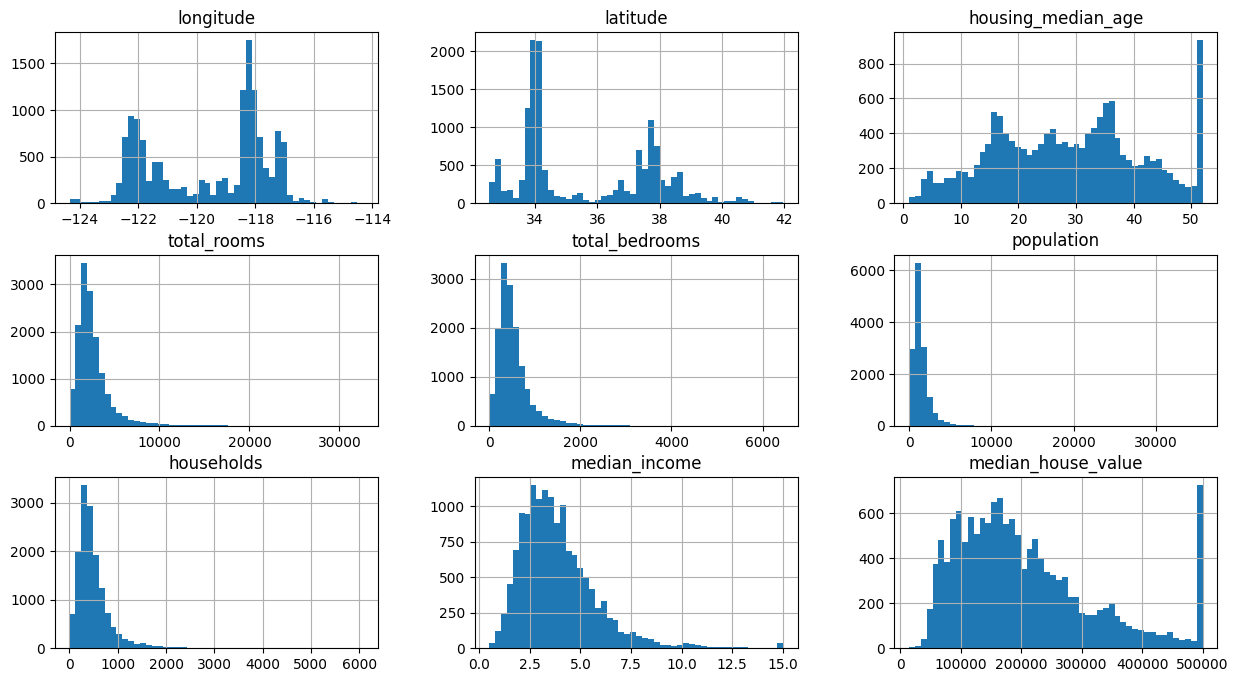

In [199]:
# Numerical Statistic Information (Check Anomalies and Outliers)
df.hist(bins= 50, figsize=(15,8))
plt.show()

## Analisis Pola Anomali & Outlier

### **Outlier Gap Besar**
- Beberapa nilai tampak **menyimpang** dari pola umum, kemungkinan karena cara data dikumpulkan.
- **`housing_median_age`**  
  Distribusinya memiliki banyak puncak kecil, tetapi ada **satu puncak besar di nilai maksimum (52)**. Ini terlihat seperti anomali dan perlu ditinjau namun tidak perlu dihapus.
- **`median_house_value`**  
  Ada **lonjakan tiba-tiba di nilai maksimum (±500.000 USD)**. Ini bisa jadi:
  - Nilai maksimum yang bisa diberikan (capped value)


### **Outlier Gap Kecil**
- Beberapa fitur memiliki **distribusi miring (skewed)** atau tidak seimbang antara nilai kecil dan nilai besar.  
  Ada sekitar **6 fitur** dengan pola ini, namun memang tipe rumah di California bisa saja berbeda.
- Fitur seperti **`population`**, **`total_bedrooms`**, dan **`total_rooms`** memiliki rentang nilai **sangat lebar**, menunjukkan adanya nilai ekstrem.  
- Ketiga fitur tersebut memiliki pola serupa:  
  ➝ mayoritas nilainya kecil, hanya sedikit yang bernilai besar, dan ini wajar karena mereka berhubungan satu sama lain.

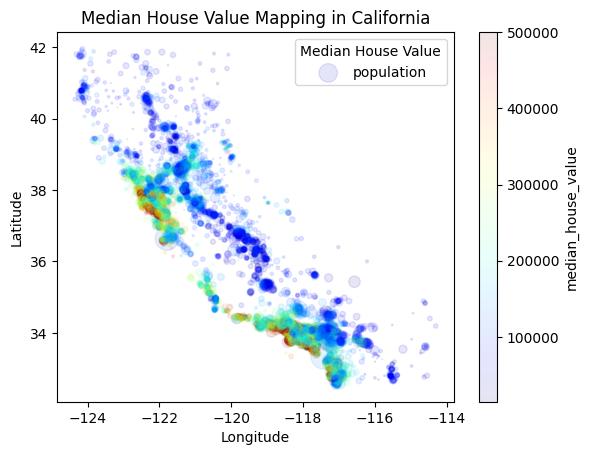

In [200]:
# Plot of Median House Value Mapping in California

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=df["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"))
plt.title('Median House Value Mapping in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Median House Value', loc='upper right')
plt.show()

**Explanation:** Nilai rumah cenderung lebih tinggi di area dekat pantai/samudra dengan longitude rendah yang berarti mengarah ke arah barat. Semakin timur, pola harga cenderung lebih murah. Karena secara geografis california, longitude memberikan inisght mengenai arah barat-timur, dimana semakin barat akan mengarah ke pesisir pantai. Selain itu, latitude mewakili bagian utara-selatan yang memberikan gambaran persebaran ekonomi di california.

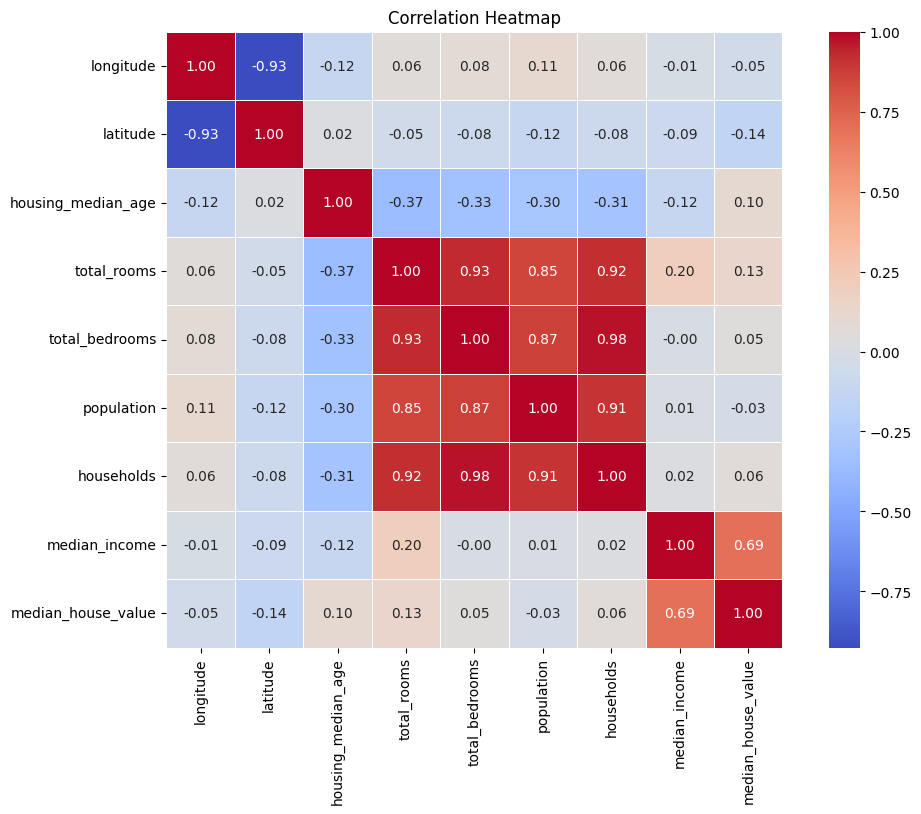

In [201]:
numeric_df = df.select_dtypes(include=['float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Heatmap California Housing Price
1.  `median_income` adalah fitur terbaik untuk memprediksi harga rumah karena memiliki korelasi tinggi dengan`median_house-value` (0,.69)
2. Lokasi (longitude & latitude) juga berpengaruh besar > harga lebih mahal di barat & selatan.  
3. Fitur hunian (rooms, bedrooms, households, population) saling berkorelasi kuat, sehingga terjadi multicollinearity dan bisa cek pairplot untuk penanganan. 
4. Fitur ratio seperti `bedrooms_per_room` memberikan insight kualitas rumah:
   - Banyak bedroom per room → rumah sempit → harga turun.


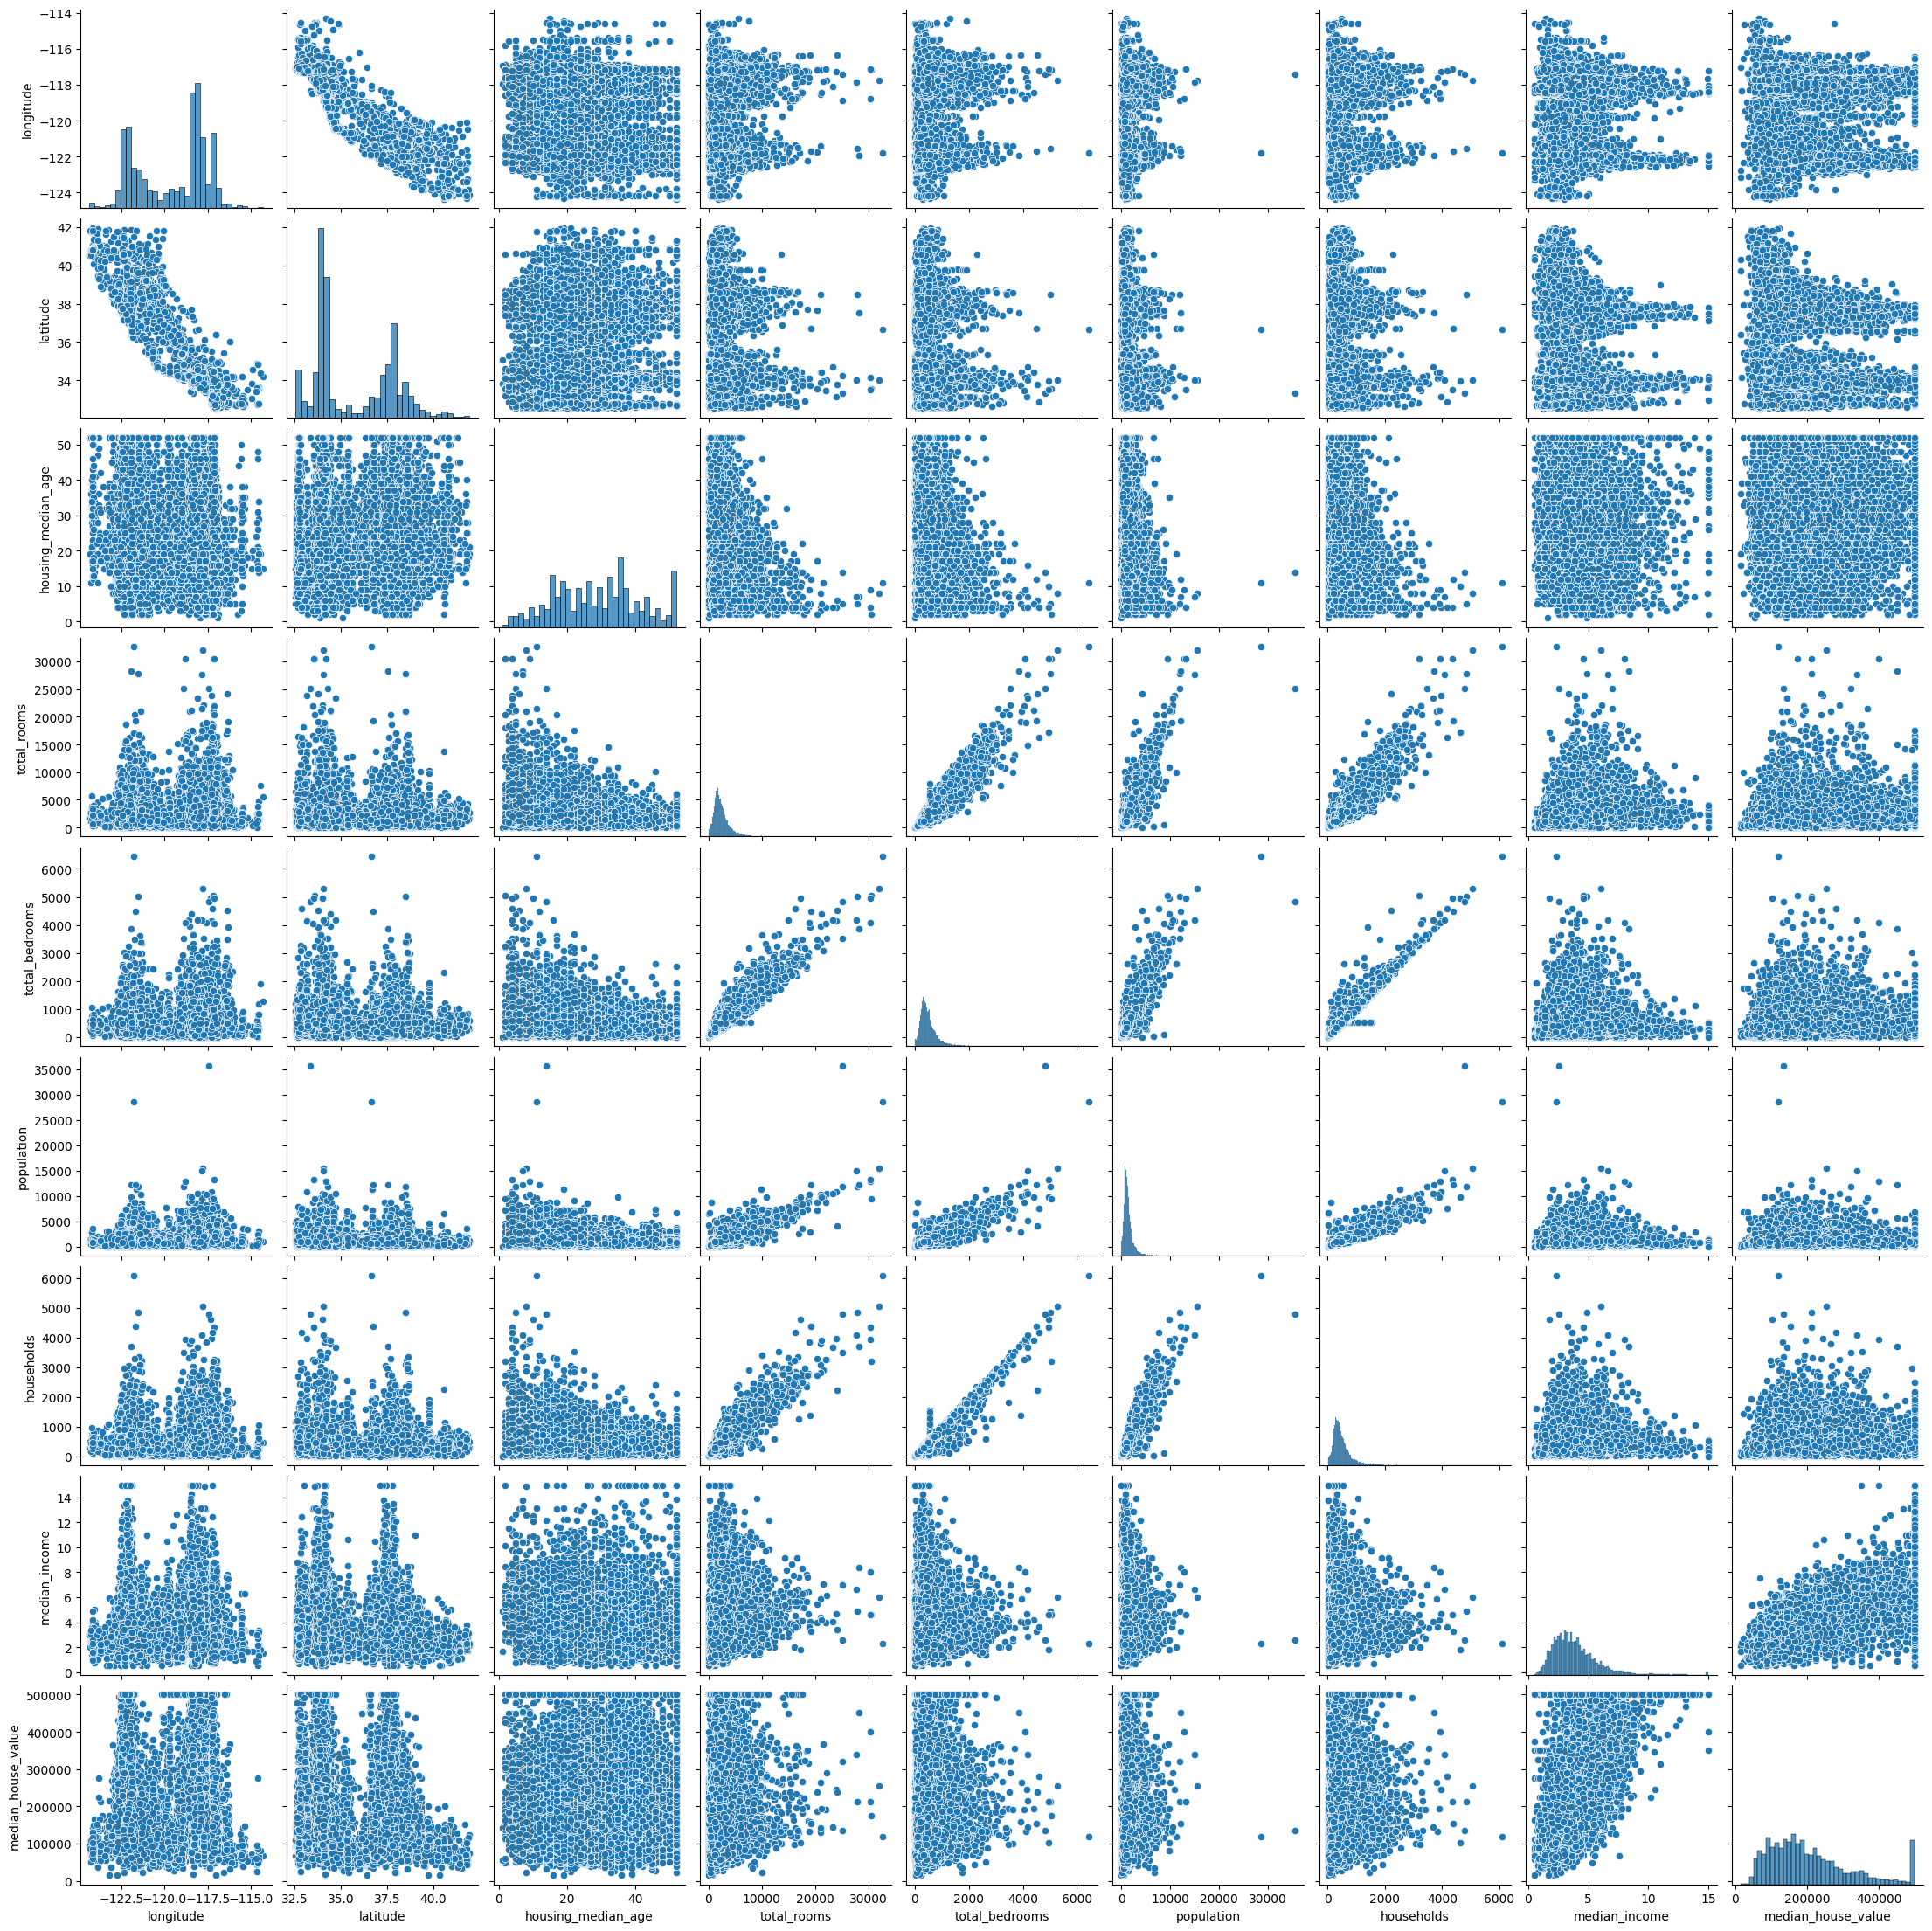

In [202]:
sns.pairplot(df)

**Expalantion:** `median_house_value` dinilai bisa menjadi target karena memiliki korelasi yang cukup signifikan terhadap kolom lainnya.

In [203]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

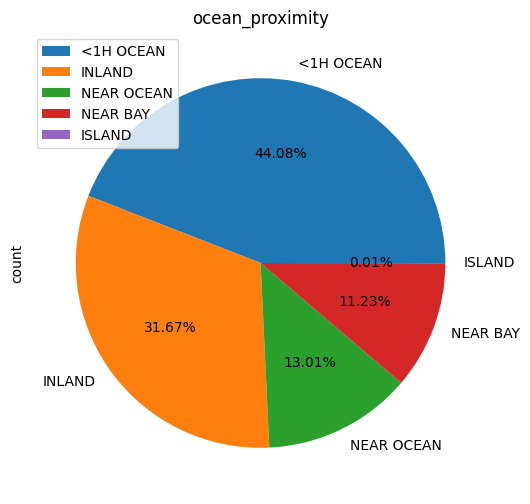

In [204]:
# Ocean Proximity Visualization (Categorical Column) 

values_ocean = df["ocean_proximity"].value_counts()
values_ocean.plot.pie(subplots = True,figsize = (10, 6),autopct='%1.2f%%')
plt.title("ocean_proximity")
plt.legend(values_ocean.index)

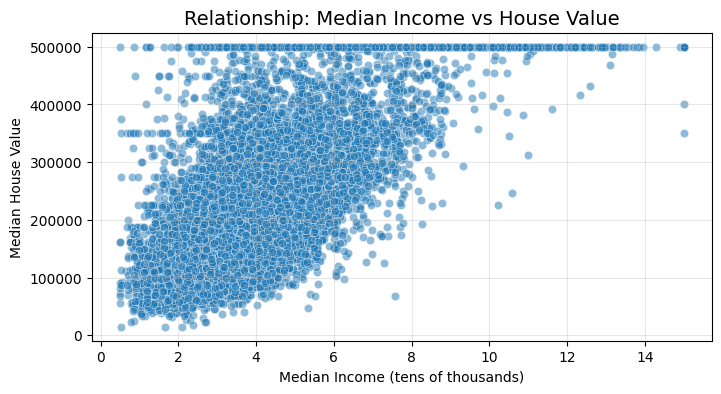


Top 10 areas with lowest income but highest house prices:
      median_income  median_house_value  income_house_ratio ocean_proximity
8215         0.4999            500001.0          100.020204          INLAND
4848         0.5360            375000.0           69.962687       <1H OCEAN
4980         0.5360            350000.0           65.298507       <1H OCEAN
2133         0.8543            500001.0           58.527566        NEAR BAY
2398         0.6775            350000.0           51.660517       <1H OCEAN
154          0.5360            275000.0           51.305970          INLAND
744          0.8836            450000.0           50.928022        NEAR BAY
2752         0.7591            350000.0           46.107232      NEAR OCEAN
2246         1.1667            500001.0           42.856004       <1H OCEAN
1186         1.1696            500001.0           42.749744        NEAR BAY


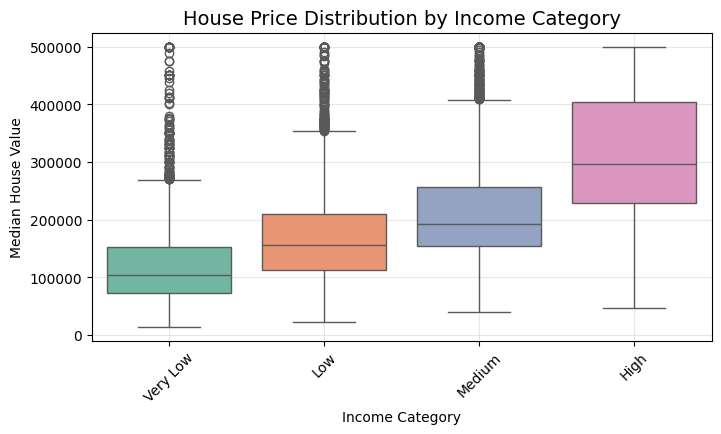


Income outliers count: 482
Percentage of income outliers: 3.34%


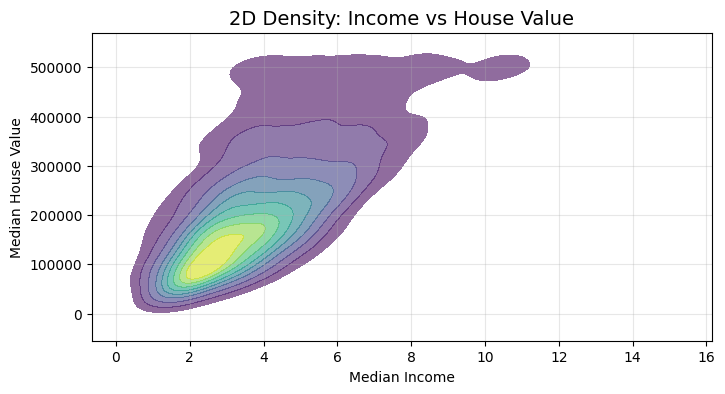

In [205]:
# Scatter Plot: Median Income vs Median House Value
plt.figure(figsize=(8, 4))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.title('Relationship: Median Income vs House Value', fontsize=14)
plt.xlabel('Median Income (tens of thousands)')
plt.ylabel('Median House Value')
plt.grid(True, alpha=0.3)

plt.show()

# Anomalies Identification for Areas with Lowest Income, Highest House Prices
df['income_house_ratio'] = df['median_house_value'] / (df['median_income'] * 10000)
print("\nTop 10 areas with lowest income but highest house prices:")
anomalies = df.sort_values('income_house_ratio', ascending=False).head(10)
print(anomalies[['median_income', 'median_house_value', 'income_house_ratio', 'ocean_proximity']])

# Boxplot for House Price Distribution by Income Category
df['income_category'] = pd.qcut(df['median_income'], q=4, 
                                 labels=['Very Low', 'Low', 'Medium', 'High'])

plt.figure(figsize=(8, 4))
sns.boxplot(x='income_category', y='median_house_value', data=df, palette='Set2')
plt.title('House Price Distribution by Income Category', fontsize=14)
plt.xlabel('Income Category')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Outliers Related to Median Income
Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

income_outliers = df[(df['median_income'] < lower_bound) | (df['median_income'] > upper_bound)]
print(f"\nIncome outliers count: {len(income_outliers)}")
print(f"Percentage of income outliers: {len(income_outliers)/len(df)*100:.2f}%")

# 2D Density
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='median_income', y='median_house_value', 
            fill=True, cmap='viridis', alpha=0.6)
plt.title('2D Density: Income vs House Value', fontsize=14)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True, alpha=0.3)
plt.show()

**Explanation:**

- **Scatter Plot:** Terdapat tren positif antara pendapatan `median_income` dan `median_house_value`. Semakin tinggi pendapatan median suatu daerah, semakin tinggi pula nilai median rumah di daerah tersebut. Grafik menunjukkan pola yang naik secara konsisten, meskipun pada tingkat pendapatan yang lebih tinggi, sebaran datanya menjadi lebih luas dan menunjukkan variasi yang lebih besar.
- **Boxplot:** Boxplot ini menunjukkan area-area yang memiliki `median_income` sangat rendah, namun harga rumah median sangat tinggi, sehingga menghasilkan rasio harga rumah terhadap pendapatan yang sangat tinggi. Contohnya: Baris pertama (ID 8215): Pendapatan median hanya $4,999 (0.4999 dalam puluhan ribu), tetapi `median_house_value` $500,001. Pola lokasi: Banyak sekitar pantai atau laut. Outliers ini sekitar 3% jadi masih bisa dibiarkan, mungkin karena daerah dekat pantai biasa dijadikan tempat wisata atau bisnis, dan rata-rata orang disana bekerja di bidang perikanan yang pendapatannya cenderung rendah.
- **2D Density:** Menunjukan korelasi yang positif tapi tidak linear. 



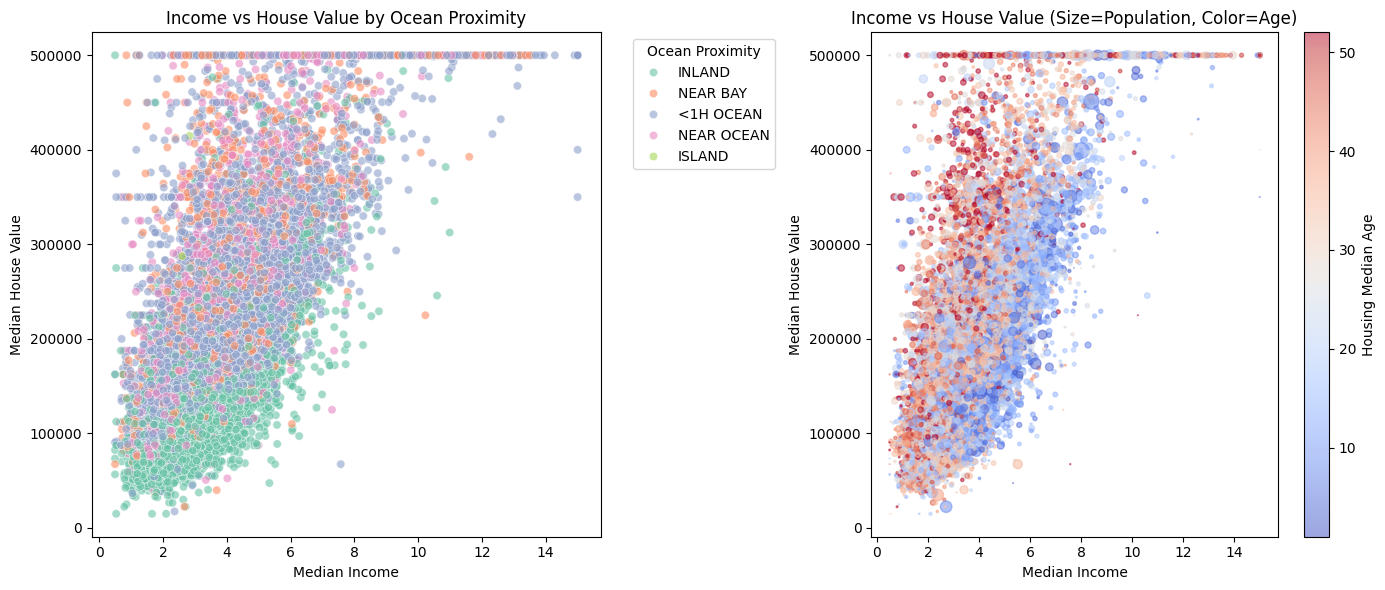

In [206]:
# I. Location Analysis 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='median_income', y='median_house_value', 
                hue='ocean_proximity', data=df, alpha=0.6, palette='Set2')
plt.title('Income vs House Value by Ocean Proximity')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend(title='Ocean Proximity', bbox_to_anchor=(1.05, 1), loc='upper left')

# II. Size by Population
plt.subplot(1, 2, 2)
sizes = df['population'] / 100 
scatter = plt.scatter(df['median_income'], df['median_house_value'], 
                      c=df['housing_median_age'], s=sizes, alpha=0.5, cmap='coolwarm')
plt.colorbar(scatter, label='Housing Median Age')
plt.title('Income vs House Value (Size=Population, Color=Age)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()

**Explanation:**
- Harga rumah dipengaruhi kuat oleh pendapatan, tetapi kedekatan dengan laut memberikan premi harga yang signifikan: daerah dekat laut memiliki harga lebih tinggi meski pendapatan serupa. 
- Selain itu, wilayah dengan populasi besar dan penduduk lebih tua cenderung memiliki harga rumah lebih tinggi. Kombinasi faktor lokasi, demografi, dan ukuran populasi menjelaskan variasi harga rumah yang tidak bisa dijelaskan oleh pendapatan saja.

### **Feature Engineering and Exploratory Data Analysis II**

In [207]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  \
0       193.0        40.0         1.9750          INLAND             47500.0   
1       836.0       277.0         2.2604        NEAR BAY            100000.0   
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0   
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0   
4       606.0       167.0         2.2206          INLAND             59200.0   

   income_house_ratio income_category  
0            2.405063        Very Low  
1            4.423996        Very Low  
2            4.537228            High  
3           10.175010        Very Low  
4            2.665946        Very Low

In [208]:
# Feature Engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Drop the original features to handle multicollinearities 
df_eda = df.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'])

In [209]:
# Variabel untuk analisis
target = 'median_house_value'
numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'median_income', 
                  'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

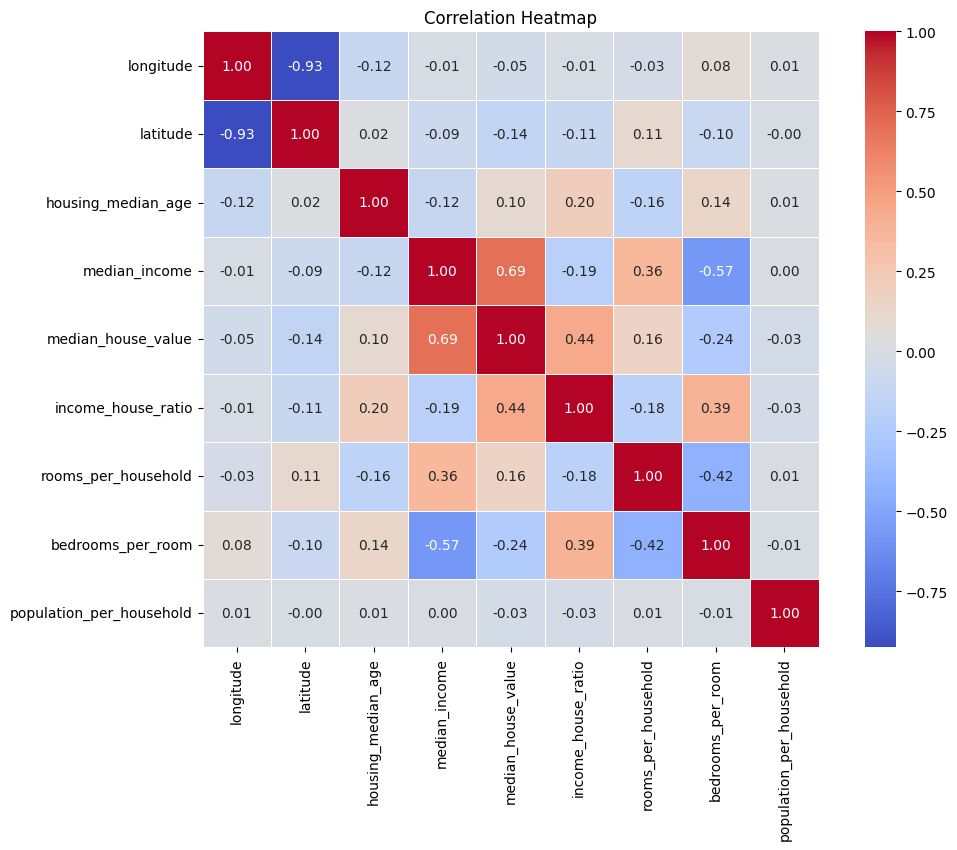

In [210]:
# Visualization of Correlation Map After Handling Multicollinearities 

numeric_df_eda = df_eda.select_dtypes(include=['float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df_eda.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

## **Label Encoding for Standardization Check**

In [211]:
dummies = pd.get_dummies(df['ocean_proximity'], dtype=int)
dummies

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       1       0         0           0
1              0       0       0         1           0
2              1       0       0         0           0
3              1       0       0         0           0
4              0       1       0         0           0
...          ...     ...     ...       ...         ...
14443          0       1       0         0           0
14444          0       1       0         0           0
14445          0       0       0         0           1
14446          1       0       0         0           0
14447          0       1       0         0           0

[14448 rows x 5 columns]

In [212]:
le=LabelEncoder()
df_eda['le_ocean_proximity'] = le.fit_transform(df_eda['ocean_proximity'])
df_eda

longitude  latitude  housing_median_age  median_income ocean_proximity  \
0        -119.79     36.73                52.0         1.9750          INLAND   
1        -122.21     37.77                43.0         2.2604        NEAR BAY   
2        -118.04     33.87                17.0         6.2990       <1H OCEAN   
3        -118.28     34.06                17.0         1.7199       <1H OCEAN   
4        -119.81     36.73                50.0         2.2206          INLAND   
...          ...       ...                 ...            ...             ...   
14443    -121.26     38.27                20.0         4.4125          INLAND   
14444    -120.89     37.48                27.0         2.9135          INLAND   
14445    -121.90     36.58                31.0         3.1977      NEAR OCEAN   
14446    -117.93     33.62                34.0         5.6315       <1H OCEAN   
14447    -115.56     32.80                15.0         1.3882          INLAND   

       median_house_value  income_house_ratio income_category  \
0                 47500.0            2.405063        Very Low   
1                100000.0            4.423996        Very Low   
2                285800.0            4.537228            High   
3                175000.0           10.175010        Very Low   
4                 59200.0            2.665946        Very Low   
...                   ...                 ...             ...   
14443            144600.0            3.277054          Medium   
14444            159400.0            5.471083             Low   
14445            289300.0            9.047128             Low   
14446            484600.0            8.605167            High   
14447             69400.0            4.999280        Very Low   

       rooms_per_household  bedrooms_per_room  population_per_household  \
0                 2.800000           0.250000                  4.825000   
1                 3.671480           0.322517                  3.018051   
2                 6.478022           0.167939                  3.810440   
3                 2.518000           0.474980                  3.051000   
4                 4.622754           0.251295                  3.628743   
...                    ...                ...                       ...   
14443             6.000000           0.174277                  3.251142   
14444             5.349282           0.174419                  3.095694   
14445             3.641221           0.376143                  1.791349   
14446             4.540598           0.234353                  2.247863   
14447             3.929530           0.280102                  3.436242   

       le_ocean_proximity  
0                       1  
1                       3  
2                       0  
3                       0  
4                       1  
...                   ...  
14443                   1  
14444                   1  
14445                   4  
14446                   0  
14447                   1  

[14448 rows x 12 columns]

In [213]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

**Explanation:** Banyak perumahan yang berkonsentrasi di wilayah dekat dengan pesisir laut (<1H Ocean), diikuti dengan Inland untuk posisi kedua. Namun secara keseluruhan, wilayah dekat dengan laut, pantai, atau samudera lebih banyak secara total jika dibandingkan dengan orang-orang yang tinggal di tengah daratan yang lebih dalam.

In [214]:
df_eda['le_ocean_proximity'].value_counts()

le_ocean_proximity
0    6369
1    4576
4    1879
3    1622
2       2
Name: count, dtype: int64

In [215]:
# Drop the ocean_proximity in order to reduce the multicollinearities 
df_eda.drop(columns='ocean_proximity',inplace=True)

In [216]:
df_eda.head()

longitude  latitude  housing_median_age  median_income  median_house_value  \
0    -119.79     36.73                52.0         1.9750             47500.0   
1    -122.21     37.77                43.0         2.2604            100000.0   
2    -118.04     33.87                17.0         6.2990            285800.0   
3    -118.28     34.06                17.0         1.7199            175000.0   
4    -119.81     36.73                50.0         2.2206             59200.0   

   income_house_ratio income_category  rooms_per_household  bedrooms_per_room  \
0            2.405063        Very Low             2.800000           0.250000   
1            4.423996        Very Low             3.671480           0.322517   
2            4.537228            High             6.478022           0.167939   
3           10.175010        Very Low             2.518000           0.474980   
4            2.665946        Very Low             4.622754           0.251295   

   population_per_household  le_ocean_proximity  
0                  4.825000                   1  
1                  3.018051                   3  
2                  3.810440                   0  
3                  3.051000                   0  
4                  3.628743                   1

Analisis Distribusi


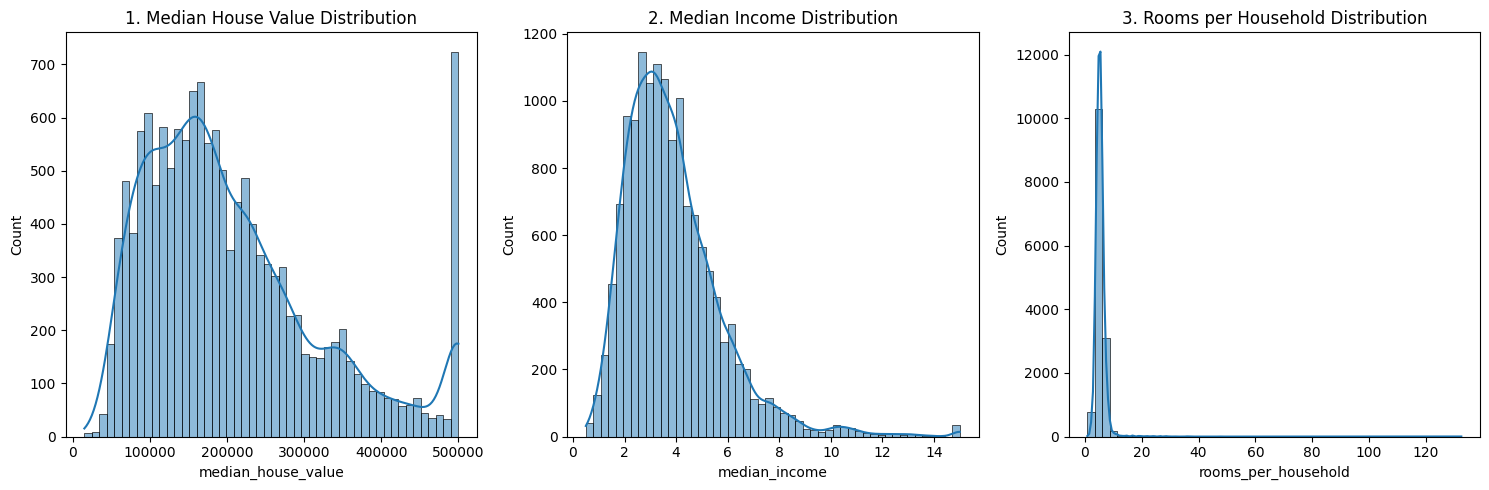

In [217]:
# Distribution Analysis (Target and Predictor)
print("Analisis Distribusi")
plt.figure(figsize=(15, 5))

# Target Distribution
plt.subplot(1, 3, 1)
sns.histplot(df_eda[target], bins=50, kde=True)
plt.title('1. Median House Value Distribution')

# Median Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(df_eda['median_income'], bins=50, kde=True)
plt.title('2. Median Income Distribution')

# Rooms per Household Distribution
plt.subplot(1, 3, 3)
sns.histplot(df_eda['rooms_per_household'], bins=50, kde=True)
plt.title('3. Rooms per Household Distribution')


plt.tight_layout()
plt.show() 


# EDA Explanation

Visualisasi berikut digunakan untuk memahami pola, sebaran data, serta potensi outlier pada tiga fitur penting hasil EDA dan feature engineering.


## 1. Median House Value Distribution

### **Insight Utama**
- Distribusi condong ke kiri namun memiliki *long tail* ke kanan.  
- Mayoritas harga rumah berada pada rentang **100.000 - 250.000 USD**.  
- Adanya lonjakan pada nilai **500.000 USD** menandakan **capped value** pada dataset asli.  
- Variasi harga rumah mahal menjadi tidak terlihat karena data dipotong

## 2️. Median Income Distribution

### **Insight Utama**
- Distribusi sangat **right-skewed**.  
- Mayoritas pendapatan berada pada **2.0 – 5.0** (≈ $20.000–$50.000).  
- Nilai ekstrem hingga **15** (≈ $150.000) jumlahnya sangat sedikit.  
- Menggambarkan mayoritas wilayah berpendapatan menengah–rendah.

## 3. Rooms per Household Distribution

### **Insight Utama** 
- Mayoritas rumah berada pada rentang **2–6 rooms per household**.  
- Outlier kemungkinan berasal dari:
  - Rumah sangat besar dihuni satu household  
  - Kesalahan pencatatan  
  - Area non-hunian tercatat sebagai household  

#  Kesimpulan Utama EDA

- Data memiliki **skewness tinggi** → perlu transformasi/log-scaling.  
- Ada **outlier ekstrem**, terutama pada `rooms_per_household`.  
- Terdapat **capped value** pada `median_house_value`.  
- `median_income` secara visual menunjukkan hubungan kuat dengan harga rumah.


In [218]:
# Mapping for EDA Purposes
mapping = {
    0: '<1H OCEAN',
    1: 'INLAND',
    2: 'ISLAND',
    3: 'NEAR BAY',
    4: 'NEAR OCEAN'
}

df_eda['ocean_proximity_label'] = df_eda['le_ocean_proximity'].map(mapping)


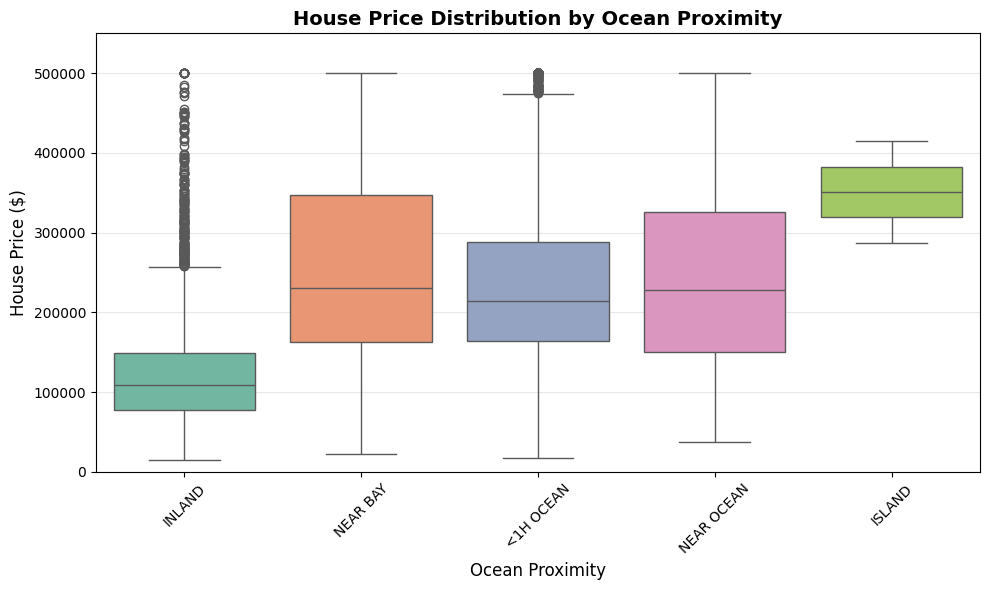

In [219]:
# Boxplot Comparison (House Price According to Ocean Proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')
plt.title('House Price Distribution by Ocean Proximity', fontsize=14, fontweight='bold')
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 550000) 
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Analisis Harga Rumah berdasarkan Ocean Proximity

Boxplot di atas menunjukkan bagaimana lokasi terhadap laut memengaruhi harga rumah. Secara umum, semakin dekat suatu area dengan laut, semakin tinggi nilai median house value yang terlihat pada distribusinya.

### **1. INLAND**
Harga rumah di daerah pedalaman adalah yang paling rendah. Sebaran utamanya berada pada kisaran 80.000–150.000 USD. Ada beberapa outlier hingga sekitar 250.000 USD, tetapi jumlahnya tidak besar. Pola ini menunjukkan bahwa lokasi yang jauh dari laut cenderung memiliki permintaan yang lebih rendah sehingga harganya lebih murah.

### 2. **NEAR BAY**
Harga rumah meningkat cukup tajam pada kategori ini. Median berada di sekitar 180.000–350.000 USD dan sebaran data meluas hingga batas maksimum 500.000 USD. Hal ini mencerminkan tingginya nilai properti di area dekat bay.

### 3. **<1H OCEAN**
Kategori ini menunjukkan median harga sekitar 190.000–280.000 USD. Meskipun tidak setinggi NEAR BAY, harga rumah tetap lebih mahal dibandingkan daerah pedalaman. Beberapa outlier mencapai lebih dari 450.000 USD. Lokasi yang berjarak kurang dari satu jam dari laut tetap memberikan nilai tambah bagi properti.

### 4. **NEAR OCEAN**
Median harga naik sedikit lebih tinggi dibanding <1H OCEAN, berada pada rentang 170.000–320.000 USD. Batas atas distribusi tetap mencapai 500.000 USD. Pola ini menunjukkan bahwa properti yang benar-benar dekat pantai memperoleh premium harga yang cukup jelas.

### 5. **ISLAND**
Kategori ini memiliki median harga tertinggi dan cenderung stabil. Mayoritas nilai berada di sekitar 330.000–360.000 USD dan hampir tidak terlihat outlier ekstrem. Harga yang tinggi dan stabil dapat disebabkan oleh daya tarik lokasi pulau dan terbatasnya ketersediaan lahan.

# Kesimpulan
1. Semakin dekat dengan laut, semakin tinggi nilai median house value.  
2. INLAND adalah kategori termurah, sedangkan ISLAND yang tertinggi.  
3. NEAR BAY dan NEAR OCEAN menunjukkan variasi harga yang cukup besar.  
4. Nilai maksimum 500.000 USD yang muncul pada beberapa kategori menandakan adanya batas (capped value) pada dataset.  
5. ocean_proximity terbukti sebagai salah satu variabel yang paling berpengaruh terhadap harga rumah tapi bisa digantikan dengan posisi yang akurat seperti longitude dan latitude, sehingga tidak masalah jika di drop.



In [220]:
# Check Outliers (IQR)
q1 = df.groupby('ocean_proximity')['median_house_value'].quantile(0.25)
q3 = df.groupby('ocean_proximity')['median_house_value'].quantile(0.75)

# Hitung IQR
iqr_basic = q3 - q1

# Gabungkan ke tabel
iqr_table = pd.DataFrame({
    'Q1 (0.25)': q1,
    'Q3 (0.75)': q3,
    'IQR (Q3 - Q1)': iqr_basic
})

iqr_table

Q1 (0.25)  Q3 (0.75)  IQR (Q3 - Q1)
ocean_proximity                                     
<1H OCEAN         164200.0   288500.0       124300.0
INLAND             77675.0   149500.0        71825.0
ISLAND            319300.0   382900.0        63600.0
NEAR BAY          162500.0   347475.0       184975.0
NEAR OCEAN        150000.0   325950.0       175950.0

## Analisis IQR Median House Value per Ocean Proximity

Tabel IQR menunjukkan seberapa lebar variasi harga rumah di setiap kategori lokasi.

**<1H OCEAN**

Q1: 164,200

Q3: 288,500

IQR: 124,300
- Variasi harga menengah. Harga cenderung stabil namun tetap dipengaruhi akses ke laut.

**INLAND**

Q1: 77,675

Q3: 149,500

IQR: 71,825
- Variasi paling kecil. Harga rumah murah dan homogen karena jauh dari laut.

**ISLAND**

Q1: 319,300

Q3: 382,900

IQR: 63,600
- Harga tinggi namun stabil. Pasar lebih premium dan seragam.

**NEAR BAY**

Q1: 162,500

Q3: 347,475

IQR: 184,975 (terbesar)
- Variasi harga paling lebar. Kondisi lingkungan bervariasi, dari area biasa hingga premium.

**NEAR OCEAN**

Q1: 150,000

Q3: 325,950

IQR: 175,950
- Variasi besar. Kedekatan dengan laut memberikan rentang harga yang luas.

**Kesimpulan Singkat**

- INLAND dan ISLAND paling stabil. NEAR BAY dan NEAR OCEAN memiliki variasi harga paling besar. Lokasi sekitar laut membuat harga lebih tidak homogen.

## **Drop the Ocean Proximity (Longitude and Latitude able to Replace)**

In [221]:
df_eda.drop(columns='ocean_proximity_label',inplace=True)
df_eda.drop(columns='le_ocean_proximity', inplace=True)
df_eda

longitude  latitude  housing_median_age  median_income  \
0        -119.79     36.73                52.0         1.9750   
1        -122.21     37.77                43.0         2.2604   
2        -118.04     33.87                17.0         6.2990   
3        -118.28     34.06                17.0         1.7199   
4        -119.81     36.73                50.0         2.2206   
...          ...       ...                 ...            ...   
14443    -121.26     38.27                20.0         4.4125   
14444    -120.89     37.48                27.0         2.9135   
14445    -121.90     36.58                31.0         3.1977   
14446    -117.93     33.62                34.0         5.6315   
14447    -115.56     32.80                15.0         1.3882   

       median_house_value  income_house_ratio income_category  \
0                 47500.0            2.405063        Very Low   
1                100000.0            4.423996        Very Low   
2                285800.0            4.537228            High   
3                175000.0           10.175010        Very Low   
4                 59200.0            2.665946        Very Low   
...                   ...                 ...             ...   
14443            144600.0            3.277054          Medium   
14444            159400.0            5.471083             Low   
14445            289300.0            9.047128             Low   
14446            484600.0            8.605167            High   
14447             69400.0            4.999280        Very Low   

       rooms_per_household  bedrooms_per_room  population_per_household  
0                 2.800000           0.250000                  4.825000  
1                 3.671480           0.322517                  3.018051  
2                 6.478022           0.167939                  3.810440  
3                 2.518000           0.474980                  3.051000  
4                 4.622754           0.251295                  3.628743  
...                    ...                ...                       ...  
14443             6.000000           0.174277                  3.251142  
14444             5.349282           0.174419                  3.095694  
14445             3.641221           0.376143                  1.791349  
14446             4.540598           0.234353                  2.247863  
14447             3.929530           0.280102                  3.436242  

[14448 rows x 10 columns]

**Explanation:** `ocean_proximity_label` tidak dibutuhkan karena data bisa digantikan dengan posisi geografis seperti latitude dan longitude, sedangkan `le_ocean_proximity` tidak digunakan karena bisa membuat prediksi bias karena bentuknya seperti ordinal. 

In [222]:
df_eda.drop(["income_house_ratio", "income_category"], axis=1, inplace=True)
df_eda

longitude  latitude  housing_median_age  median_income  \
0        -119.79     36.73                52.0         1.9750   
1        -122.21     37.77                43.0         2.2604   
2        -118.04     33.87                17.0         6.2990   
3        -118.28     34.06                17.0         1.7199   
4        -119.81     36.73                50.0         2.2206   
...          ...       ...                 ...            ...   
14443    -121.26     38.27                20.0         4.4125   
14444    -120.89     37.48                27.0         2.9135   
14445    -121.90     36.58                31.0         3.1977   
14446    -117.93     33.62                34.0         5.6315   
14447    -115.56     32.80                15.0         1.3882   

       median_house_value  rooms_per_household  bedrooms_per_room  \
0                 47500.0             2.800000           0.250000   
1                100000.0             3.671480           0.322517   
2                285800.0             6.478022           0.167939   
3                175000.0             2.518000           0.474980   
4                 59200.0             4.622754           0.251295   
...                   ...                  ...                ...   
14443            144600.0             6.000000           0.174277   
14444            159400.0             5.349282           0.174419   
14445            289300.0             3.641221           0.376143   
14446            484600.0             4.540598           0.234353   
14447             69400.0             3.929530           0.280102   

       population_per_household  
0                      4.825000  
1                      3.018051  
2                      3.810440  
3                      3.051000  
4                      3.628743  
...                         ...  
14443                  3.251142  
14444                  3.095694  
14445                  1.791349  
14446                  2.247863  
14447                  3.436242  

[14448 rows x 8 columns]

**Explanation:** Drop `income_house_ratio` and `income_category` as those two are only for EDA purposes.

## **Train Test Split**

In [223]:
x = df_eda.drop(["median_house_value"], axis=1)
y = df_eda["median_house_value"]

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y,
    test_size=0.2,
    random_state=123
)

## **Imbalance Check**

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'longitude'),
  Text(1, 0, 'latitude'),
  Text(2, 0, 'housing_median_age'),
  Text(3, 0, 'median_income'),
  Text(4, 0, 'median_house_value'),
  Text(5, 0, 'rooms_per_household'),
  Text(6, 0, 'bedrooms_per_room'),
  Text(7, 0, 'population_per_household')])

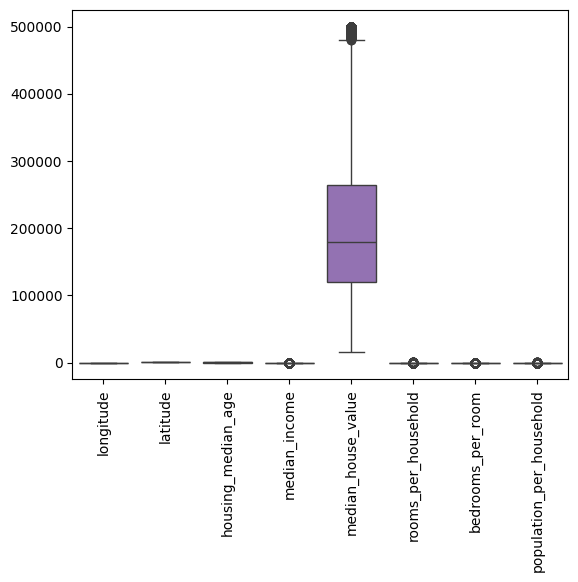

In [224]:
# Imabalance Check for Target (Visualization)

sns.boxplot(
    data=df_eda
)
plt.xticks(rotation = 90)

**Explanation:** Outliers tidak terlalu ekstrim untuk median_income, rooms_per_household, berdooms_per_room, population_per_household, namun terdapat outliers yang cukup ekstrim untuk bagian median_house_value. Dalam analisis ini, bisa jadi 500,000 USD adalah market capped (batas) bagi rumah-rumah yang melebihi jumlah tersebut. Dalam kondisi ini, karena tidak ada angka yang jelas, nilai dari median_house_value tidak ada yang diubah untuk mempertahankan keaslian data. 

## **Preprocessing**

In [225]:
numerical_features = df_eda.columns.drop("median_house_value")

prepros = ColumnTransformer([
    ("Standard Scaling", StandardScaler(), numerical_features)
], remainder="passthrough")

prepros

ColumnTransformer(remainder='passthrough',
                  transformers=[('Standard Scaling', StandardScaler(),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object'))])

**Explanation:** Karena hanya ada beberapa missing value yang sudah diperbaiki di awal, serta kolom yang menyebabkan multikolinearitas tinggi sudah di drop, maka yang tersisa hanyalah `numerical_features` dengan sedikit perbaikan, akan di standarisasi menjadi satuan yang sesuai dengan standard scaler. `ocean_proximity` yang berbentuk kategorikal pun sudah tidak diperlukan karena bisa diwakilkan dengan nilai `longitude` dan `latitude`.

## **Cross Validation (KFold)**

In [226]:
kfold = KFold(
    n_splits=5,
    shuffle=True,
    random_state=123
)

**Explanation:**

- Cross-validation memberikan estimasi performa model yang lebih **akurasi dan stabil** dibandingkan hanya sekali split data.
- Membantu mendeteksi **overfitting** dan memastikan model dapat **generaliasi** dengan baik ke data baru.
- Memaksimalkan penggunaan data dengan melatih dan menguji model pada berbagai subset data.
- Sangat penting untuk dataset kompleks seperti California Housing yang memiliki distribusi data dan fitur yang bervariasi.


## **Modeling (6 Variances)**

In [227]:
# Define Model

# Base Model and Ensemble Learning

linereg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
dt = DecisionTreeRegressor(random_state=42, max_depth=5)
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=100)
svm = SVR(kernel='rbf')
lgbm = LGBMRegressor(random_state=42, n_estimators=100, max_depth=5) 

model = [linereg, knn, dt, rf, svm, lgbm]
model_names = ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'SVR', 'LightGBM']

## **Scoring**

In [228]:
CVMAPE = []
avgMAPE = []
stdMAPE = []
CVSRMSE = []
avgRMSE = []
stdRMSE = []
CVR2 = []
avgR2 = []
stdR2 = []

for i, name in zip(model, model_names):
    pipemodel = Pipeline([
        ('Prepros', prepros),
        ('Model', i)
    ])

    scoreMAPE = cross_val_score(pipemodel, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_percentage_error')
    scoreRMSE = cross_val_score(pipemodel, xtrain, ytrain, cv=5, scoring='neg_root_mean_squared_error')
    scoreR2 = cross_val_score(pipemodel, xtrain, ytrain, cv=5, scoring='r2')

    CVMAPE.append(scoreMAPE)
    avgMAPE.append(abs(scoreMAPE.mean()))
    stdMAPE.append(scoreMAPE.std())

    CVSRMSE.append(scoreRMSE)
    avgRMSE.append(abs(scoreRMSE.mean()))
    stdRMSE.append(scoreRMSE.std())

    CVR2.append(scoreR2)
    avgR2.append(scoreR2.mean())
    stdR2.append(scoreR2.std())

summary = pd.DataFrame({
    'Model' : model_names,
    'Avg MAPE' : avgMAPE,
    'Std MAPE' : stdMAPE,
    'Avg RMSE' : avgRMSE,
    'Std RMSE' : stdRMSE,
    'Avg R2 Score' : avgR2,
    'Std R2 Score' : stdR2
}).sort_values(by='Avg MAPE', ascending=True)

summary

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1582
[LightGBM] [Info] Number of data points in the train set: 9246, number of used features: 7
[LightGBM] [Info] Start training from score 205763.100584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

Model  Avg MAPE  Std MAPE       Avg RMSE     Std RMSE  \
5               LightGBM  0.185840  0.004576   49384.747294   293.343807   
1    KNeighborsRegressor  0.225093  0.005304   61229.965421   773.166006   
3  RandomForestRegressor  0.301769  0.009415   67205.115127   931.092703   
0       LinearRegression  0.310309  0.008774   73900.068498  4363.398523   
2  DecisionTreeRegressor  0.320727  0.006931   72375.824052  1193.974968   
4                    SVR  0.525148  0.015943  118460.561256  2114.191220   

   Avg R2 Score  Std R2 Score  
5      0.817200      0.005066  
1      0.718936      0.010498  
3      0.661369      0.013990  
0      0.588362      0.059598  
2      0.607238      0.017308  
4     -0.051215      0.014831

**Explanation:** 

- Terdapat perbedaan signifikan antara nilai RMSE dan MAE pada semua model, dimana RMSE secara konsisten lebih tinggi karena mengkuadratkan error terlebih dahulu sebelum dirata-ratakan. Metrik RMSE memberikan 'bobot' lebih besar terhadap error yang besar, sehingga perbedaan ini mengindikasikan adanya outlier atau prediksi dengan error ekstrem dalam dataset.
    - Berdasarkan ranking performa, LightGBM menjadi model terbaik dengan nilai RMSE terendah (49,385) sekaligus MAPE terendah (18.6%) dan R² tertinggi (0.817). Model ini unggul secara komprehensif di semua metrik evaluasi.
    - KNeighborsRegressor menempati posisi runner-up dengan performa solid, sedangkan RandomForest berada di peringkat ketiga. 
    - Selanjutnya akan dilakukan prediksi terhadap test set ke 3 benchmark terbaik, yaitu LightGBM, KNN, dan RandomForest.

## **Pick Up 3 Best Models and Predict to Test Set**

In [229]:
models = {
    'LightGBM': LGBMRegressor(random_state=1, n_estimators=100, max_depth=5),
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

for name, mdl in models.items():

    pipeline = Pipeline([
        ('preprocessing', prepros), 
        ('model', mdl)
    ])
    
    pipeline.fit(xtrain, ytrain)
    y_pred = pipeline.predict(xtest)

    score_rmse.append(np.sqrt(mean_squared_error(ytest, y_pred)))
    score_mae.append(mean_absolute_error(ytest, y_pred))
    score_mape.append(mean_absolute_percentage_error(ytest, y_pred))

score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape
}, index=models.keys())

score_before_tuning

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1582
[LightGBM] [Info] Number of data points in the train set: 11558, number of used features: 7
[LightGBM] [Info] Start training from score 207018.943502
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

RMSE           MAE      MAPE
LightGBM      47537.855646  32386.517019  0.187461
KNN           58895.422801  39987.588028  0.231420
RandomForest  51486.240032  34063.850069  0.200197

**Explanation:**

(1) **LightGBM adalah model terbaik**

RMSE terkecil (47,537.86) → error kuadrat terkecil.

MAE terkecil (32,386.52) → deviasi absolut terkecil.

MAPE terkecil (18.75%) → rata-rata kesalahan relatif hanya ~19%.

(2) **KNN adalah model terburuk**

RMSE tertinggi (58,895.42) → error besar sering terjadi.

MAPE 23.14% → kesalahan relatif hampir seperempat dari nilai sebenarnya.

(3) **RandomForest berada di tengah**

Lebih baik dari KNN, tapi kalah dari LightGBM.

**Kesimpulan:** Setelah melakukan predict ke test set pada 3 model terbaik, lightGBM memimpin skor.

## **Hyperparameter Tuning LightGBM Model for Best Result (GridSearchCV)**

In [230]:
# Define LGBM Model
lgbm = LGBMRegressor(random_state=42)

# Parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200, 300],          
    'max_depth': [5, 10, 20, None],           
    'learning_rate': [0.01, 0.05, 0.1],       
    'num_leaves': [31, 50, 70],                
    'min_child_samples': [20, 30, 50]          
}

# Use GridSearch
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fitting to the data training
grid.fit(xtrain, ytrain)

print("Best Parameters:", grid.best_params_)
print("Best CV RMSE:", (-grid.best_score_)**0.5)

# Best Model
best_lgbm = grid.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1582
[LightGBM] [Info] Number of data points in the train set: 11558, number of used features: 7
[LightGBM] [Info] Start training from score 207018.943502
Best Parameters: {'learning_rate': 0.1, 'max_depth': None, 'min_child_samples': 50, 'n_estimators': 300, 'num_leaves': 31}
Best CV RMSE: 46164.84006888119


## **Hyperparameter Tuning Evaluation**

In [231]:
# Ambil model terbaik LightGBM
best_lgbm = grid.best_estimator_

# Buat pipeline final dengan preprocessing dan model terbaik
final_model = Pipeline([
    ('preprocessing', prepros),
    ('model', best_lgbm)
])

# Fitting pipeline ke train set
final_model.fit(xtrain, ytrain)

# Predict ke test set
y_pred = final_model.predict(xtest)

# Hitung metrics
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
mae = mean_absolute_error(ytest, y_pred)
mape = mean_absolute_percentage_error(ytest, y_pred)

# DataFrame hasil metrics
score_after_tuning = pd.DataFrame({
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape]
}, index=['LightGBM_Tuned'])

print(score_after_tuning)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1582
[LightGBM] [Info] Number of data points in the train set: 11558, number of used features: 7
[LightGBM] [Info] Start training from score 207018.943502
                        RMSE           MAE      MAPE
LightGBM_Tuned  44371.437779  29435.134065  0.170574


## **Performance Comparison Before vs. After Tuning**

In [232]:
# Before Hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['LightGBM']).T

RMSE           MAE      MAPE
LightGBM  47537.855646  32386.517019  0.187461

In [233]:
# After Hyperparameter tuning
score_after_tuning

RMSE           MAE      MAPE
LightGBM_Tuned  44371.437779  29435.134065  0.170574

## **Metrics Evaluation:** 
- Alasan menggunakan RMSE dan MAE adalah memberikan nilai yang absolut (dalam konteks ini adalah y= target berupa dollar yang bisa memberikan hasil prediksi secara efisien), serta MAPE yang menunjukkan presentase error pada prediksi. 

**Explanation:** 
- Hyperparameter tuning berhasil meningkatkan performa model LightGBM secara signifikan dengan mengurangi semua metrik error. **RMSE turun 6.7% menjadi $44,371**, **MAE turun 9.1% menjadi $29,435**, dan **MAPE turun 9.0% menjadi 17.06%**. Ini berarti model sekarang 9% lebih akurat dalam memprediksi harga rumah, dengan **error rata-rata berkurang sekitar $3,000 untuk properti $300,000**. 

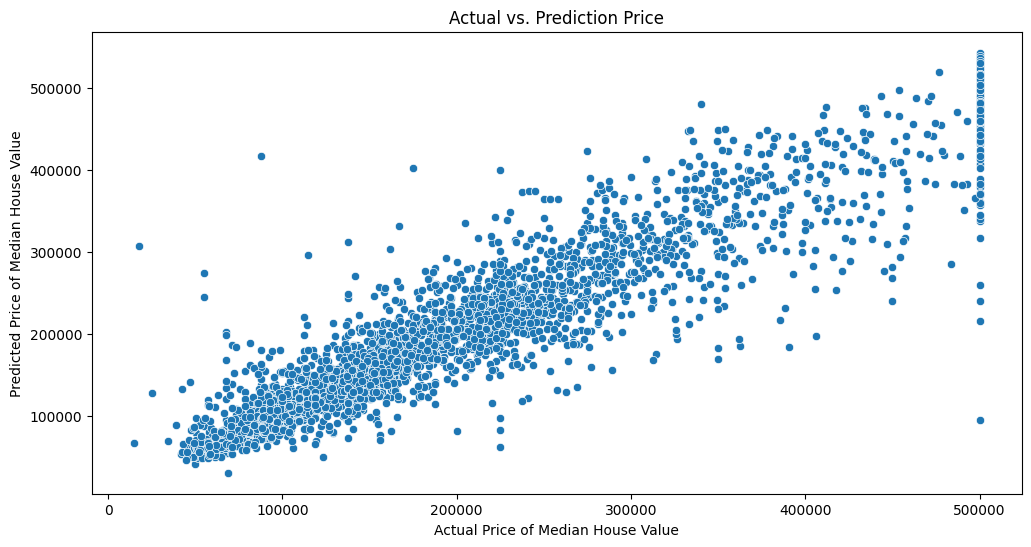

In [234]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(x=ytest, y=y_pred).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price of Median House Value', 
                                               ylabel='Predicted Price of Median House Value');

**Explanation:**

- Berdasarkan grafik perbandingan harga aktual dan prediksi, dapat disimpulkan bahwa model prediksi harga rumah ini secara umum memiliki performa yang baik, karena mayoritas titik data terletak sangat dekat dengan garis diagonal ideal yang merepresentasikan prediksi sempurna, terutama pada rentang harga menengah antara $100.000 hingga $350.000 di mana prediksi dan aktual hampir selalu berimpit. Namun, model menunjukkan kelemahan dalam memprediksi kasus-kasus ekstrem, baik untuk rumah dengan harga sangat tinggi di atas $400.000 maupun sangat rendah, di mana sebaran titik data menjadi lebih lebar dan terdapat beberapa outlier yang menyimpang signifikan dari garis ideal, baik berupa overprediction maupun underprediction.Namun, secara keseluruhan, hasilnya tidak bias. Dikarenakan, **RMSE sebesar $44,371** dan **MAPE sebesar 17.06%** dinilai **Good Forecasting** sesuai dengan jurnal Lewis, C. D. (1982). Industrial and Business Forecasting Methods. Butterworth-Heinemann. 

## **Feature Importances**

In [235]:
# Feature Importances (After Model Training)
importances = best_lgbm.feature_importances_
feature_names = numerical_features
pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

feature  importance
1                  latitude        1824
0                 longitude        1744
6  population_per_household        1305
3             median_income        1205
4       rooms_per_household        1053
5         bedrooms_per_room        1009
2        housing_median_age         860

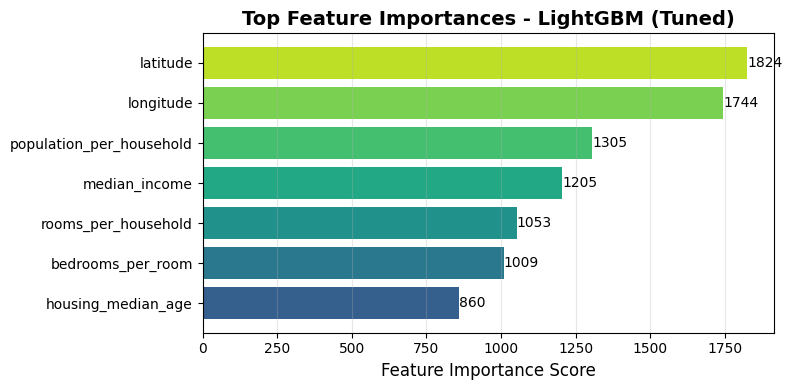

In [236]:
# Plot feature importances untuk LightGBM Tuned

plt.figure(figsize=(8, 4))
feature_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)
bars = plt.barh(feature_imp.index, feature_imp.values, 
                color=plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_imp))))

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.0f}', va='center', fontsize=10)

plt.xlabel('Feature Importance Score', fontsize=12)
plt.title('Top Feature Importances - LightGBM (Tuned)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [237]:
importances = best_lgbm.feature_importances_
feature_names = numerical_features

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances,
    'percentage': (importances / importances.sum() * 100)  # Hitung persentase
}).sort_values('importance', ascending=False)

print("FEATURE IMPORTANCES DENGAN PERSENTASE:")
print(importance_df.to_string(float_format=lambda x: f'{x:.4f}'))

# Ringkasan
print(f"Total Importance: {importances.sum():.4f}")
print(f"Number of features: {len(feature_names)}")
print(f"Average importance per feature: {(importances.sum()/len(feature_names)):.4f}")

FEATURE IMPORTANCES DENGAN PERSENTASE:
                    feature  importance  percentage
1                  latitude        1824     20.2667
0                 longitude        1744     19.3778
6  population_per_household        1305     14.5000
3             median_income        1205     13.3889
4       rooms_per_household        1053     11.7000
5         bedrooms_per_room        1009     11.2111
2        housing_median_age         860      9.5556
Total Importance: 9000.0000
Number of features: 7
Average importance per feature: 1285.7143


**Explanation:** 
- Lokasi geografis yaitu latitude dan longitude menyumbang 39.5% dari kekuatan prediksi harga rumah, menegaskan bahwa "lokasi adalah penentu" dalam pasar properti.
- Faktor demografi (seperti kepadatan penghuni per rumah tangga) dan ekonomi (pendapatan median) bersama-sama berkontribusi sekitar 27.8%, sementara karakteristik fisik rumah (seperti jumlah kamar dan proporsi kamar tidur) memberikan 23% pengaruh.
- Usia median rumah memiliki peran paling kecil, hanya 9.6%, menunjukkan bahwa dalam model ini, lokasi, kondisi sosial-ekonomi, dan spesifikasi fisik rumah jauh lebih menentukan daripada sekadar usia bangunan.

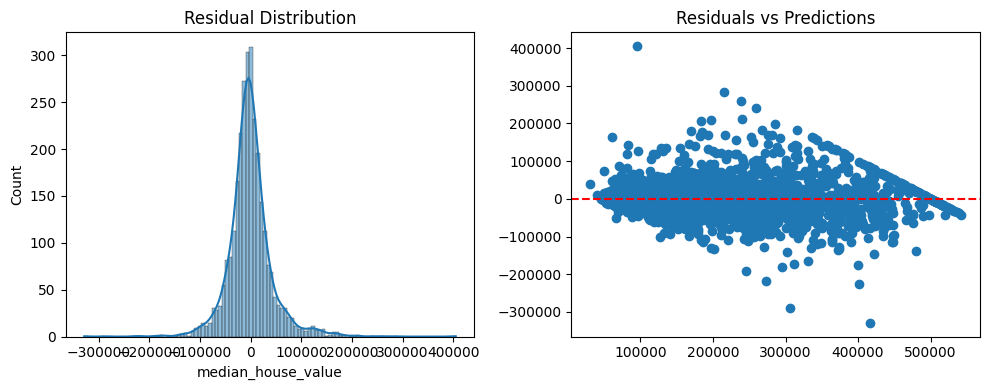

In [238]:
# Residuals After Predictions

residuals = ytest - y_pred
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predictions')
plt.tight_layout()
plt.show()

### **Explanation:**

**1. (Residual Distribution): Left**

Define: (x) = Besarnya Residual dalam Dolar, (y) = Banyak Kejadian (count)

- Puncaknya ada di sekitar 0, artinya, banyak sekali prediksi yang hampir tepat (selisihnya kecil). Ini bagus.
- (bell-shaped) dan simetris sehingga menunjukkan pola error yang normal dan tidak berat sebelah. Model tidak terus-menerus salah prediksi ke arah yang sama.
- Ada "ekor" yang menjalar ke kiri dan kanan, yang menunjukkan bahwa tetap ada beberapa prediksi yang meleset diharga yang besar.

**2. (Residuals vs Predictions): Right**

Define: (x) = Harga Prediksi Model, (y) = Residual (Selisih Harga Asli - Harga Prediksi)

- Titik-titik berkumpul di sekitar garis horizontal y=0,  untuk berbagai tingkat harga prediksi, rata-rata residualnya mendekati nol. Tidak ada bias sistematis.
- Sebaran titik relatif seragam secara umum, tidak ada pola tertentu (misalnya titik membentuk kurva). Ini baik, berarti model sudah menangkap hubungan linear dengan cukup baik.
- Sebaran residual cenderung melebar saat prediksi meningkat, terlihat dari titik-titik yang lebih "berhamburan" di sisi kanan grafik (prediksi harga tinggi).

## **Limitations**

**Data, Preprocessing, and Feature Engineering: Overall Limitations**

- Capstone Project 3 ini memiliki beberapa keterbatasan yang terutama berasal dari dataset yang digunakan. Data California Housing ini sebenarnya sudah sangat lama (tahun 1990), sehingga kondisi pasar properti saat itu sudah tidak relevan dengan situasi saat ini. Selain itu, nilai harga rumah juga dibatasi maksimal 500.001 USD, sehingga model tidak bisa benar-benar mempelajari variasi rumah dengan harga tinggi. Fitur yang tersedia pun cukup terbatas, dimana tidak ada informasi penting seperti luas bangunan, jumlah kamar sebenarnya, tingkat kriminalitas, akses transportasi, padahal hal-hal seperti itu sangat memengaruhi harga rumah di dunia nyata. Informasi lokasi hanya mengandalkan latitude dan longitude tanpa teknik geografis tambahan, jadi model belum bisa menangkap karakteristik wilayah secara mendalam. Dari sisi preprocessing, beberapa fitur dihapus untuk mengatasi multicollinearity, tetapi hal ini juga berpotensi mengurangi informasi penting. Selain itu juga, satu fitur kategorikal seperti `ocean_proximity` untuk future research bisa dilakukan One Hot Encoding (OHE) tanpa menghapusnya dari fitur. Terakhir, distribusi target yang tidak rata sebenarnya cocok untuk transformasi seperti log-transform, tetapi pendekatan itu belum diterapkan. Semua keterbatasan ini membuat model belum bisa mencapai performa maksimal. 

In [241]:
import pickle

# Save Model
with open("pipeline_california.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [240]:
# Load Model
with open("pipeline_california.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully!")

Model loaded successfully!
